In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

E:\Anaconda3\lib\site-packages\scipy\__init__.py:140: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.16.4)
  UserWarning)


In [2]:
os.getcwd()

'C:\\Users\\Shivangi Kanodia\\Desktop\\Python_Scripts'

In [3]:
data = pd.read_csv('city_weather.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
Unnamed: 0            2000 non-null int64
name                  2000 non-null object
date_txt              2000 non-null object
country               2000 non-null object
lat                   2000 non-null float64
lon                   2000 non-null float64
clouds                2000 non-null int64
rain                  2000 non-null float64
wind_direction_deg    2000 non-null float64
wind_speed            2000 non-null float64
sea_level             2000 non-null int64
temp_max              2000 non-null float64
grnd_level            2000 non-null float64
temp_min              2000 non-null float64
humidity              2000 non-null int64
temp                  2000 non-null float64
pressure              2000 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 265.7+ KB


In [5]:
data.describe()

,Unnamed: 0,lat,lon,clouds,rain,wind_direction_deg,wind_speed,sea_level,temp_max,grnd_level,temp_min,humidity,temp,pressure
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,22.537318,77.910984,51.883500,0.453280,126.088610,2.376366,1012.130000,299.409290,978.390068,299.347500,63.305000,299.389735,1012.130000
std,577.494589,5.287204,4.666829,41.856145,1.320804,87.160148,1.244381,2.158803,3.994122,34.729091,3.981042,19.297984,3.989839,2.158803
min,0.000000,9.926100,70.802200,0.000000,0.000000,0.000000,0.021000,1007.000000,278.974000,801.326000,278.974000,13.000000,278.974000,1007.000000
25%,499.750000,19.018500,73.854300,1.000000,0.000000,64.590250,1.446000,1011.000000,296.924500,962.509500,296.890250,49.000000,296.910000,1011.000000
50%,999.500000,22.653550,77.265250,56.000000,0.000000,103.878000,2.228000,1012.000000,299.413000,985.664000,299.326000,66.000000,299.399000,1012.000000
75%,1499.250000,26.296800,80.321800,98.000000,0.000000,168.064750,3.042250,1013.000000,302.003000,1004.838000,301.975500,79.000000,301.991500,1013.000000
max,1999.000000,34.074700,91.753900,100.000000,16.062000,359.641000,9.572000,1024.000000,308.844000,1014.562000,308.844000,97.000000,308.844000,1024.000000


In [6]:
data.isnull().sum() 
# No Null Value

Unnamed: 0            0
name                  0
date_txt              0
country               0
lat                   0
lon                   0
clouds                0
rain                  0
wind_direction_deg    0
wind_speed            0
sea_level             0
temp_max              0
grnd_level            0
temp_min              0
humidity              0
temp                  0
pressure              0
dtype: int64

In [7]:
data.shape

(2000, 17)

In [8]:
data.head()

,Unnamed: 0,name,date_txt,country,lat,lon,clouds,rain,wind_direction_deg,wind_speed,sea_level,temp_max,grnd_level,temp_min,humidity,temp,pressure
0,0,Mumbai,2019-10-16 12:00:00,IN,19.0144,72.8479,16,0.0,12.291,2.461,1010,306.390,1005.797,304.233,63,306.390,1010
1,1,Mumbai,2019-10-16 15:00:00,IN,19.0144,72.8479,0,0.0,58.298,1.823,1011,303.620,1007.287,302.000,65,303.620,1011
2,2,Mumbai,2019-10-16 18:00:00,IN,19.0144,72.8479,12,0.0,88.312,2.105,1011,301.480,1007.842,300.400,66,301.480,1011
3,3,Mumbai,2019-10-16 21:00:00,IN,19.0144,72.8479,100,0.0,69.014,2.295,1010,300.420,1006.776,299.885,64,300.420,1010
4,4,Mumbai,2019-10-17 00:00:00,IN,19.0144,72.8479,100,0.0,54.559,2.768,1010,298.995,1006.822,298.995,66,298.995,1010


In [9]:
#Splitting the date_text to see the temp_min at diferent hurs of time and different days
    
data['time']=data["date_txt"].str.split(" ", n = 2, expand = True)[1]
data['day']=data["date_txt"].str.split(" ", n = 2, expand = True)[0]
data['time'][:5]
data['day'][:5]




0    2019-10-16
1    2019-10-16
2    2019-10-16
3    2019-10-16
4    2019-10-17
Name: day, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

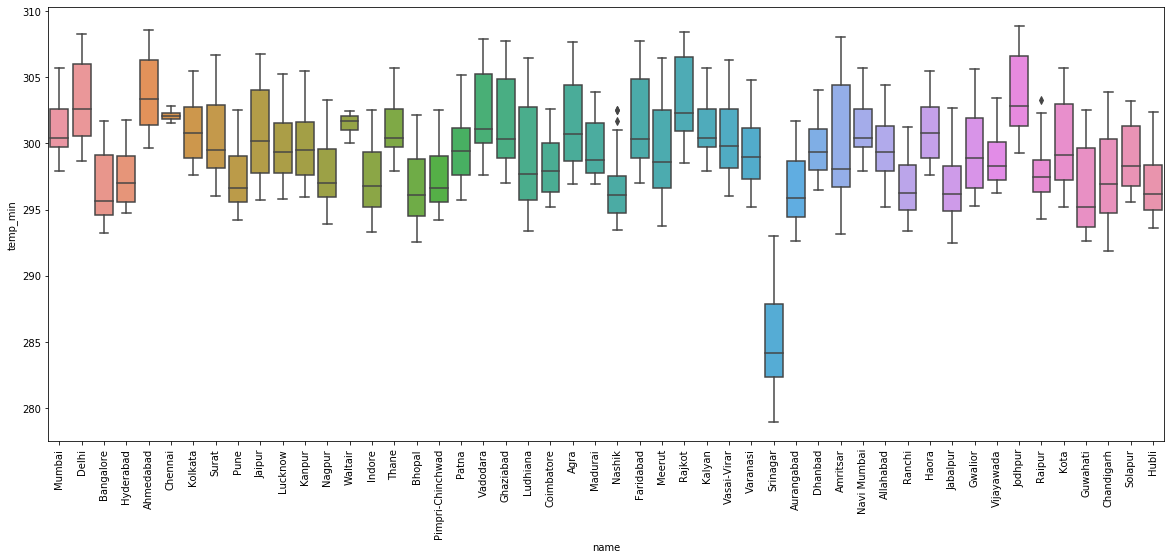

In [10]:
#Exploratory data Analysis
# Finding outliers
plt.subplots(figsize=(20,8))
sns.boxplot(x="name",
                y="temp_min",
                data=data)
plt.xticks(rotation=90)



In [11]:
#Obsevation
#Srinagar has lowest min_temp Range
#Chennai and Waltair has min variation in temp
#Nashik and Raipur has outliers 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

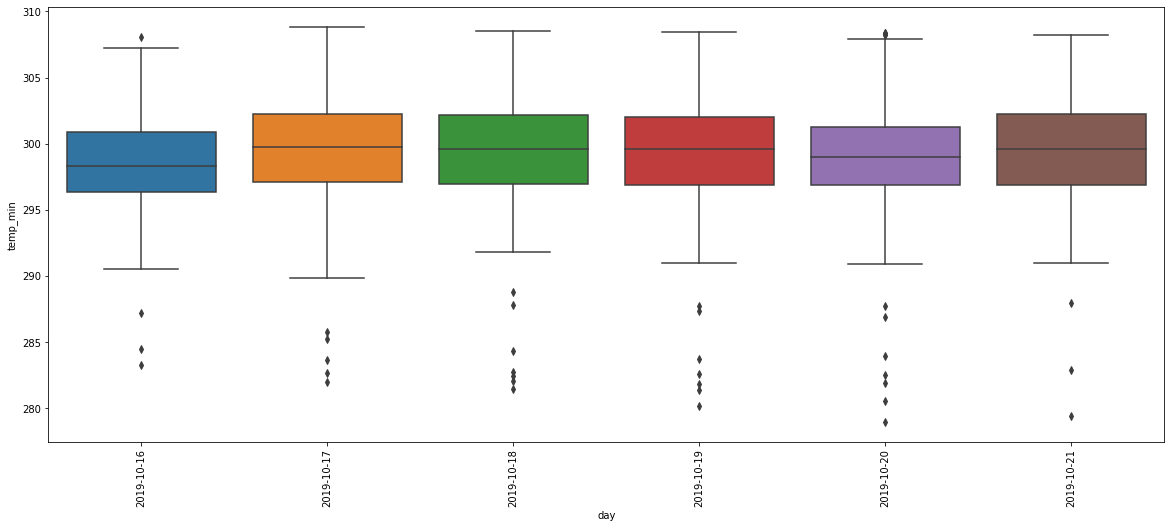

In [12]:
# Visualizing temp on differnt Days
plt.subplots(figsize=(20,8))
sns.boxplot(x="day",
                y="temp_min",
                data=data)
plt.xticks(rotation=90)
# No major variation in 6 days)

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

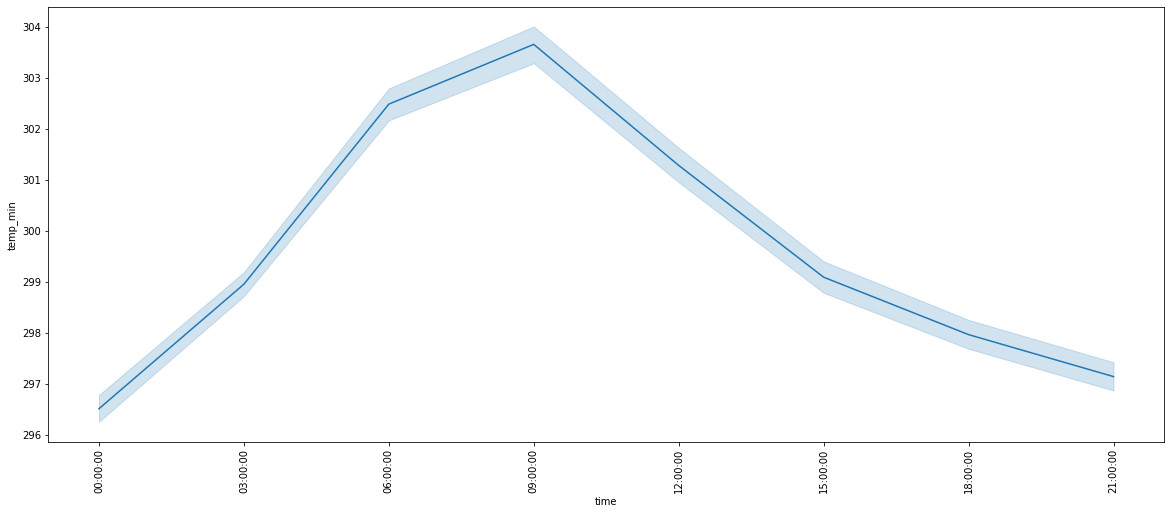

In [13]:
#Visualizing min_temp at diff time intervals of a day
plt.subplots(figsize=(20,8))
sns.lineplot(x="time",
                y="temp_min",
                data=data[data.name != 'Srinagar'])
plt.xticks(rotation=90)


In [14]:
#temp_min is min as 00:00:00, increases during the day and starts dropping again at 9 PM

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

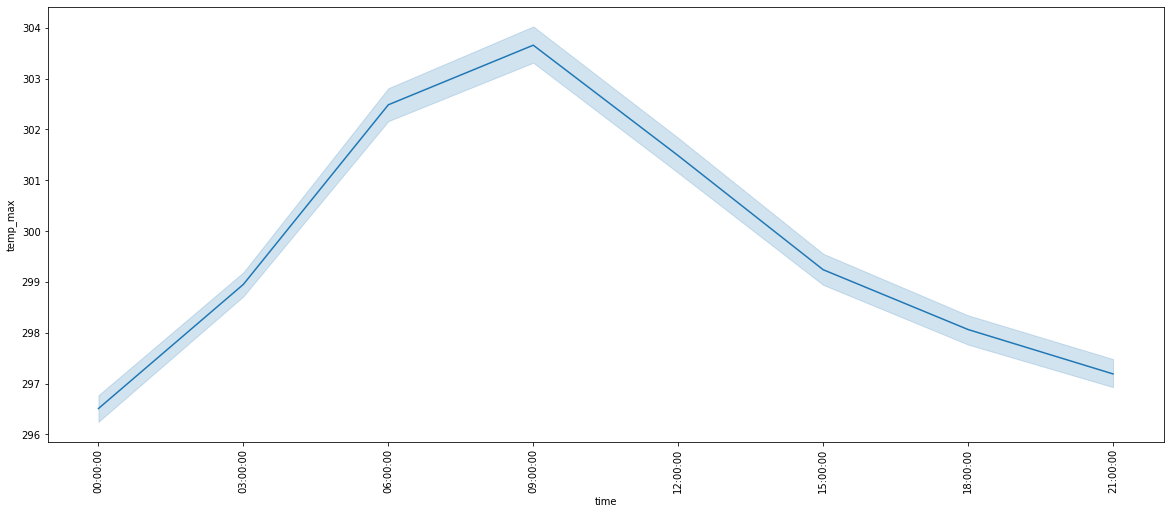

In [15]:
#Visualizing max_temp at diff time intervals of a day
plt.subplots(figsize=(20,8))
sns.lineplot(x="time",
                y="temp_max",
                data=data[data.name != 'Srinagar'])
plt.xticks(rotation=90)
#a.legend(loc='name')
#min temp Srinagar

In [16]:
#Min temp variation at different time in a tabular form
a=pd.DataFrame(data[data.name != 'Srinagar'].groupby('time').agg({'temp_min':np.mean}))
a

,temp_min
time,
00:00:00,296.508808
03:00:00,298.952208
06:00:00,302.485645
09:00:00,303.658433
12:00:00,301.283155
15:00:00,299.089641
18:00:00,297.962706
21:00:00,297.139384


In [17]:
for col in data.columns:
    print(f"{col}:   {len(data[col].unique())} unique values:")

Unnamed: 0:   2000 unique values:
name:   50 unique values:
date_txt:   40 unique values:
country:   1 unique values:
lat:   50 unique values:
lon:   50 unique values:
clouds:   101 unique values:
rain:   142 unique values:
wind_direction_deg:   1753 unique values:
wind_speed:   1429 unique values:
sea_level:   18 unique values:
temp_max:   1605 unique values:
grnd_level:   1722 unique values:
temp_min:   1605 unique values:
humidity:   85 unique values:
temp:   1614 unique values:
pressure:   18 unique values:
time:   8 unique values:
day:   6 unique values:


In [18]:
#Label encoding categorical values 
#Country has 1 value ..can ignore and drop this column

#Converting Categorical values to numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["name_encode"] = le.fit_transform(data['name'])
data["date_txt_encode"] = le.fit_transform(data['date_txt'])
data["time"] = le.fit_transform(data['time'])
data["day"] = le.fit_transform(data['day'])



In [19]:
data.head()

,Unnamed: 0,name,date_txt,country,lat,lon,clouds,rain,wind_direction_deg,wind_speed,...,temp_max,grnd_level,temp_min,humidity,temp,pressure,time,day,name_encode,date_txt_encode
0,0,Mumbai,2019-10-16 12:00:00,IN,19.0144,72.8479,16,0.0,12.291,2.461,...,306.390,1005.797,304.233,63,306.390,1010,4,0,31,0
1,1,Mumbai,2019-10-16 15:00:00,IN,19.0144,72.8479,0,0.0,58.298,1.823,...,303.620,1007.287,302.000,65,303.620,1011,5,0,31,1
2,2,Mumbai,2019-10-16 18:00:00,IN,19.0144,72.8479,12,0.0,88.312,2.105,...,301.480,1007.842,300.400,66,301.480,1011,6,0,31,2
3,3,Mumbai,2019-10-16 21:00:00,IN,19.0144,72.8479,100,0.0,69.014,2.295,...,300.420,1006.776,299.885,64,300.420,1010,7,0,31,3
4,4,Mumbai,2019-10-17 00:00:00,IN,19.0144,72.8479,100,0.0,54.559,2.768,...,298.995,1006.822,298.995,66,298.995,1010,0,1,31,4


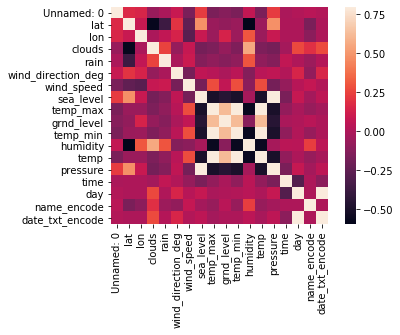

In [20]:
#correlation matrix


corrmat = data.corr()
corrmat
#f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, vmax=.8, square=True);
#Observation :  pressure <> sea level
#               temp_max <> temp_min
#               temp <> temp_min <> temp_max

In [21]:
#sea level and pressure are highly correlated ..can drop any 1
# country column can be dropped
data = data.drop(columns = ['country','name','pressure','date_txt'])




In [22]:

data.head()

,Unnamed: 0,lat,lon,clouds,rain,wind_direction_deg,wind_speed,sea_level,temp_max,grnd_level,temp_min,humidity,temp,time,day,name_encode,date_txt_encode
0,0,19.0144,72.8479,16,0.0,12.291,2.461,1010,306.390,1005.797,304.233,63,306.390,4,0,31,0
1,1,19.0144,72.8479,0,0.0,58.298,1.823,1011,303.620,1007.287,302.000,65,303.620,5,0,31,1
2,2,19.0144,72.8479,12,0.0,88.312,2.105,1011,301.480,1007.842,300.400,66,301.480,6,0,31,2
3,3,19.0144,72.8479,100,0.0,69.014,2.295,1010,300.420,1006.776,299.885,64,300.420,7,0,31,3
4,4,19.0144,72.8479,100,0.0,54.559,2.768,1010,298.995,1006.822,298.995,66,298.995,0,1,31,4


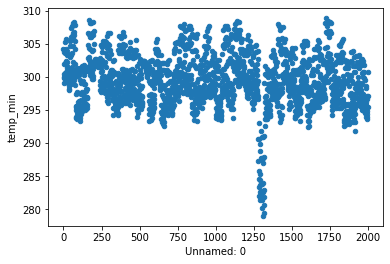

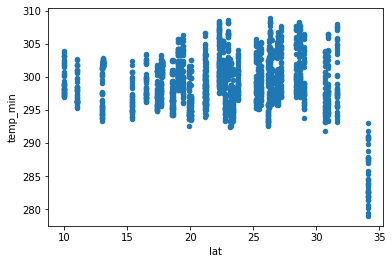

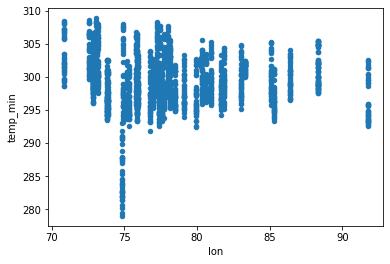

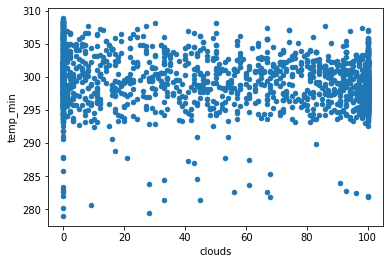

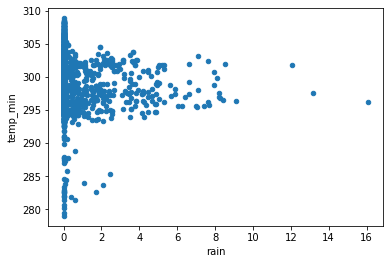

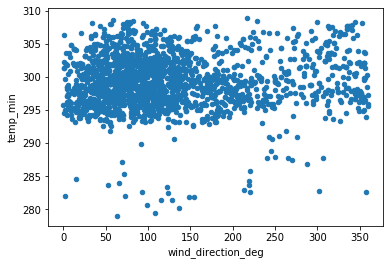

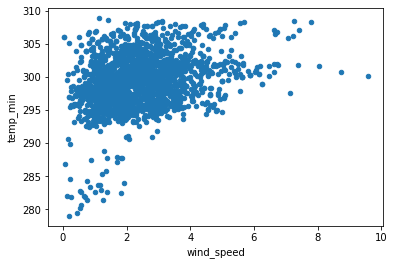

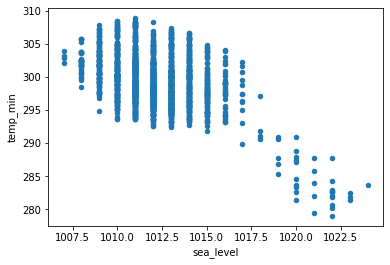

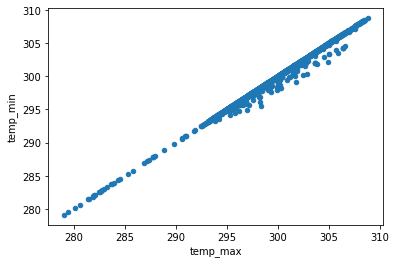

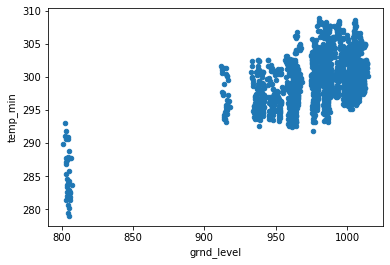

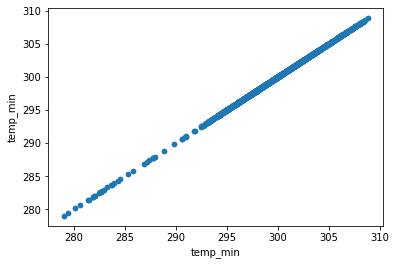

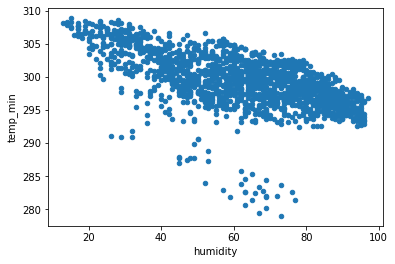

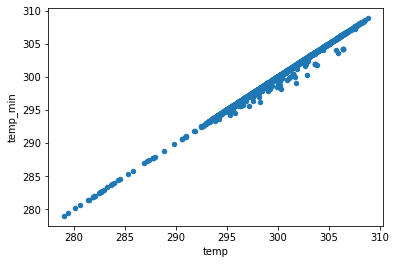

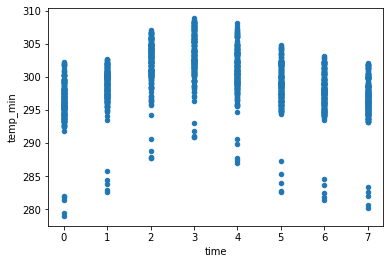

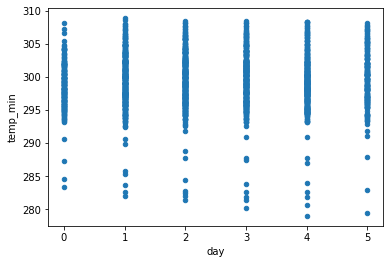

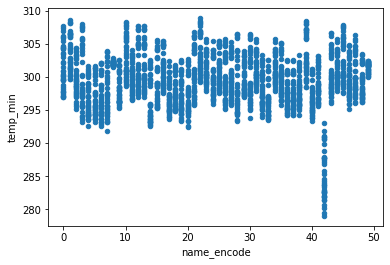

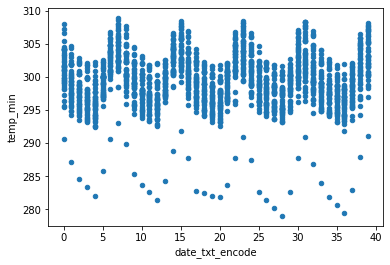

In [23]:
#scatter plot Temp_min <> other independent variables


for col in data.columns:
    temp = pd.concat([data[col], data['temp_min']], axis=1)
    temp.plot.scatter(x=col, y='temp_min')
    plt.show;
    


In [24]:
#<Observation> : lat > 33 seems to have lower range of temp_min (Srinagar in this case)
#                lon ~ 75 have min temperatutre (Jaipur,Indore,Ludhiana,Srinagar,Aurangabad,Amritsar,Kota,Solapur,Hubli)
#                as wind speed increases , temp_min increases
#                at higher sea level(hill stations) , temp_min drops
#                More HUmidity ,less temp_min 
#                min temp varies across day
#Skewness to be treated for better Accuracy

In [25]:
data.columns

Index(['Unnamed: 0', 'lat', 'lon', 'clouds', 'rain', 'wind_direction_deg',
       'wind_speed', 'sea_level', 'temp_max', 'grnd_level', 'temp_min',
       'humidity', 'temp', 'time', 'day', 'name_encode', 'date_txt_encode'],
      dtype='object')

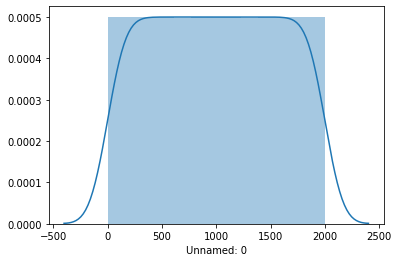

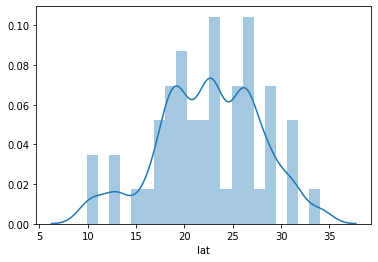

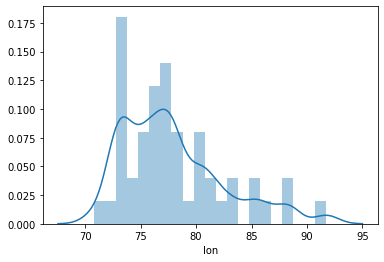

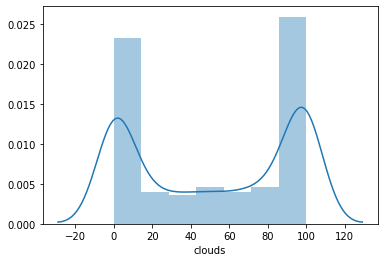

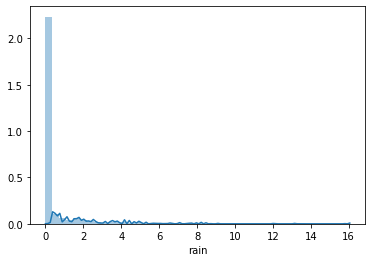

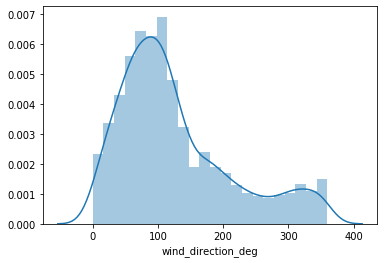

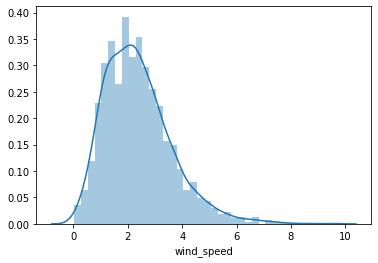

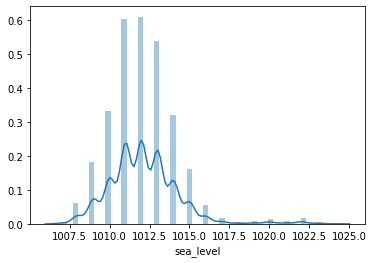

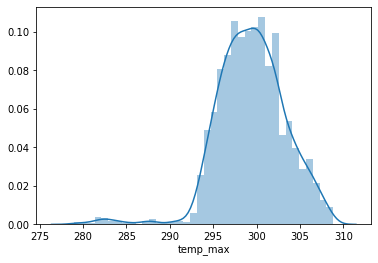

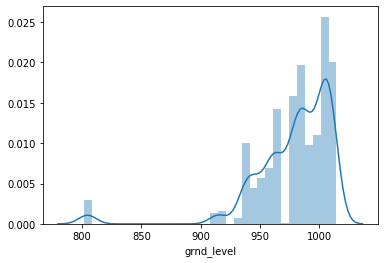

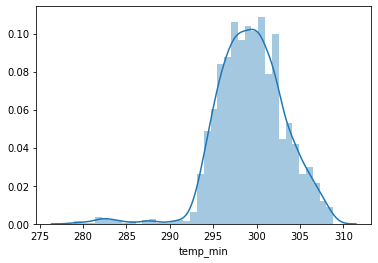

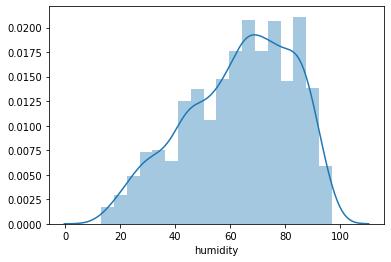

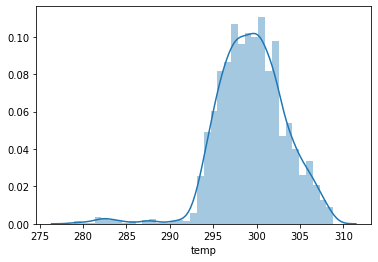

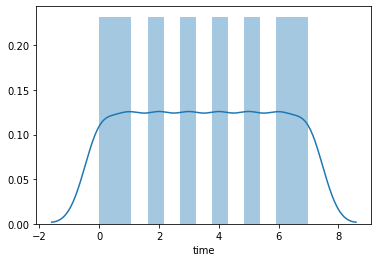

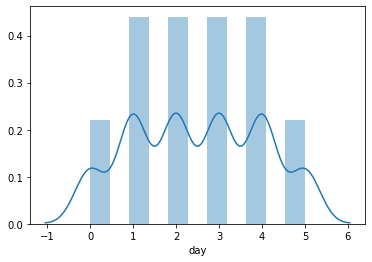

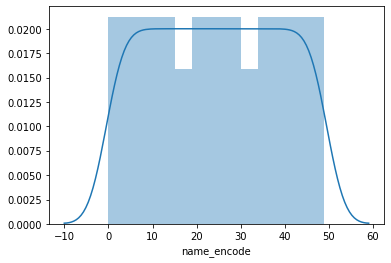

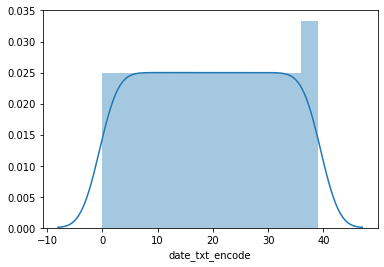

In [26]:
#skewness all  variables

for col1 in data.columns:
    sns.distplot(data[col1],kde = True)
    data[col].skew()
    plt.show()
    #data[col].skew()
    
#Observation : Left skewed

In [27]:
#<Observation> : humidity left skewed
#                grnd_level left skewed
#                wind_speed Right skewed
#                wind_direction_deg right skewed
#                Rain righ skewed
#Skewness to be treated for better Accuracy

In [29]:
print(data.skew().sort_values())

grnd_level           -2.608052
temp_max             -0.728937
temp                 -0.726941
temp_min             -0.721474
humidity             -0.434129
lat                  -0.223239
clouds               -0.093648
day                   0.000000
time                  0.000000
Unnamed: 0            0.000000
name_encode           0.000000
date_txt_encode       0.000000
lon                   0.982324
wind_direction_deg    1.026416
wind_speed            1.047687
sea_level             1.230073
rain                  4.499675
dtype: float64


In [32]:
#normalizing skewed variables using boxcox
from scipy.stats import boxcox

data['humidity_t'],lmbda = boxcox(data['humidity'],lmbda= None)
data['lon_t'],lmbda = boxcox(data['lon'],lmbda= None)
data['rain_t']=  np.log(data['rain']+1) # boxcox(data['rain']+1,lmbda= None)
data['wind_direction_deg_t']=   np.log(data['wind_direction_deg']+1)  #boxcox(data['wind_direction_deg']+1,lmbda= None)
data['wind_speed_t'],lmbda = boxcox(data['wind_speed'],lmbda= None)
data['sea_level_t'],lmbda = boxcox(data['sea_level'],lmbda= None)
data['grnd_level_t'],lmbda = boxcox(data['grnd_level'],lmbda= None)



In [33]:
print(data.skew().sort_values())
#print(data1.skew())
#print(data1['humidity'].skew())

grnd_level             -2.608052
wind_direction_deg_t   -1.200905
temp_max               -0.728937
temp                   -0.726941
temp_min               -0.721474
humidity               -0.434129
grnd_level_t           -0.236980
lat                    -0.223239
humidity_t             -0.184314
clouds                 -0.093648
name_encode             0.000000
lon_t                   0.000000
date_txt_encode         0.000000
day                     0.000000
Unnamed: 0              0.000000
sea_level_t             0.000000
time                    0.000000
wind_speed_t            0.026677
lon                     0.982324
wind_direction_deg      1.026416
wind_speed              1.047687
sea_level               1.230073
rain_t                  2.522656
rain                    4.499675
dtype: float64


In [34]:
#Drop columns for which we have created normalized data
data = data.drop(columns = ['humidity','lon','rain','wind_direction_deg_t','sea_level_t','grnd_level','wind_speed'])


In [ ]:
print(data.skew())



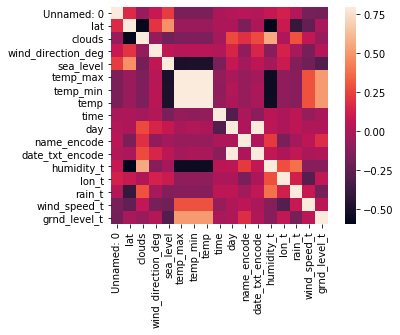

In [35]:
corrmat = data.corr()
corrmat
#f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, vmax=.8, square=True);

#data.corr['temp_min']
# Observation: (|corr| > 0.4)wind_speed,sea_level,temp_max,grnd_level,humidity,temp , pressure  correlated to our target variable 

In [36]:
# We need to scale the data as pressure temp have higher values and clouds winds have lower ranges
data.describe()

,Unnamed: 0,lat,clouds,wind_direction_deg,sea_level,temp_max,temp_min,temp,time,day,name_encode,date_txt_encode,humidity_t,lon_t,rain_t,wind_speed_t,grnd_level_t
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2.000000e+03
mean,999.500000,22.537318,51.883500,126.088610,1012.130000,299.409290,299.347500,299.389735,3.500000,2.500000,24.500000,19.500000,272.445933,1.554841e-01,0.204788,0.937165,1.404503e+52
std,577.494589,5.287204,41.856145,87.160148,2.158803,3.994122,3.981042,3.989839,2.291861,1.500375,14.434479,11.546283,111.541813,3.736055e-14,0.473780,0.767154,5.765652e+51
min,0.000000,9.926100,0.000000,0.000000,1007.000000,278.974000,278.974000,278.974000,0.000000,0.000000,0.000000,0.000000,26.788462,1.554841e-01,0.000000,-1.866523,3.507803e+50
25%,499.750000,19.018500,1.000000,64.590250,1011.000000,296.924500,296.890250,296.910000,1.750000,1.000000,12.000000,9.750000,183.060555,1.554841e-01,0.000000,0.400149,9.221806e+51
50%,999.500000,22.653550,56.000000,103.878000,1012.000000,299.413000,299.326000,299.399000,3.500000,2.500000,24.500000,19.500000,280.788922,1.554841e-01,0.000000,0.959050,1.409181e+52
75%,1499.250000,26.296800,98.000000,168.064750,1013.000000,302.003000,301.975500,301.991500,5.250000,4.000000,37.000000,29.250000,363.438240,1.554841e-01,0.000000,1.432413,1.987079e+52
max,1999.000000,34.074700,100.000000,359.641000,1024.000000,308.844000,308.844000,308.844000,7.000000,5.000000,49.000000,39.000000,487.851156,1.554841e-01,2.836854,3.850089,2.359504e+52


In [37]:

# Split the data into training/testing sets
X = data.drop(columns = ['temp_min'])
y = data['temp_min']

print(X.shape)
print(y.shape)


(2000, 16)
(2000,)


In [38]:
# Splitting into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [40]:
# Create linear regression object
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
from sklearn.metrics import mean_squared_error
error1=mean_squared_error(y_test, y_pred)
error1

0.07681929850238774

In [41]:
coef = pd.Series(regr.coef_, index = X.columns)
coef.sort_values(ascending=False)

temp                  3.526515
temp_max              0.375205
day                   0.034758
date_txt_encode       0.032577
lon_t                 0.029400
clouds                0.025132
wind_speed_t          0.012733
wind_direction_deg    0.009760
lat                   0.004387
name_encode           0.003803
rain_t                0.002486
grnd_level_t          0.001714
Unnamed: 0           -0.005314
sea_level            -0.018277
time                 -0.018795
humidity_t           -0.060572
dtype: float64

Text(0.5, 1.0, 'Feature importance Using Linear Regression ')

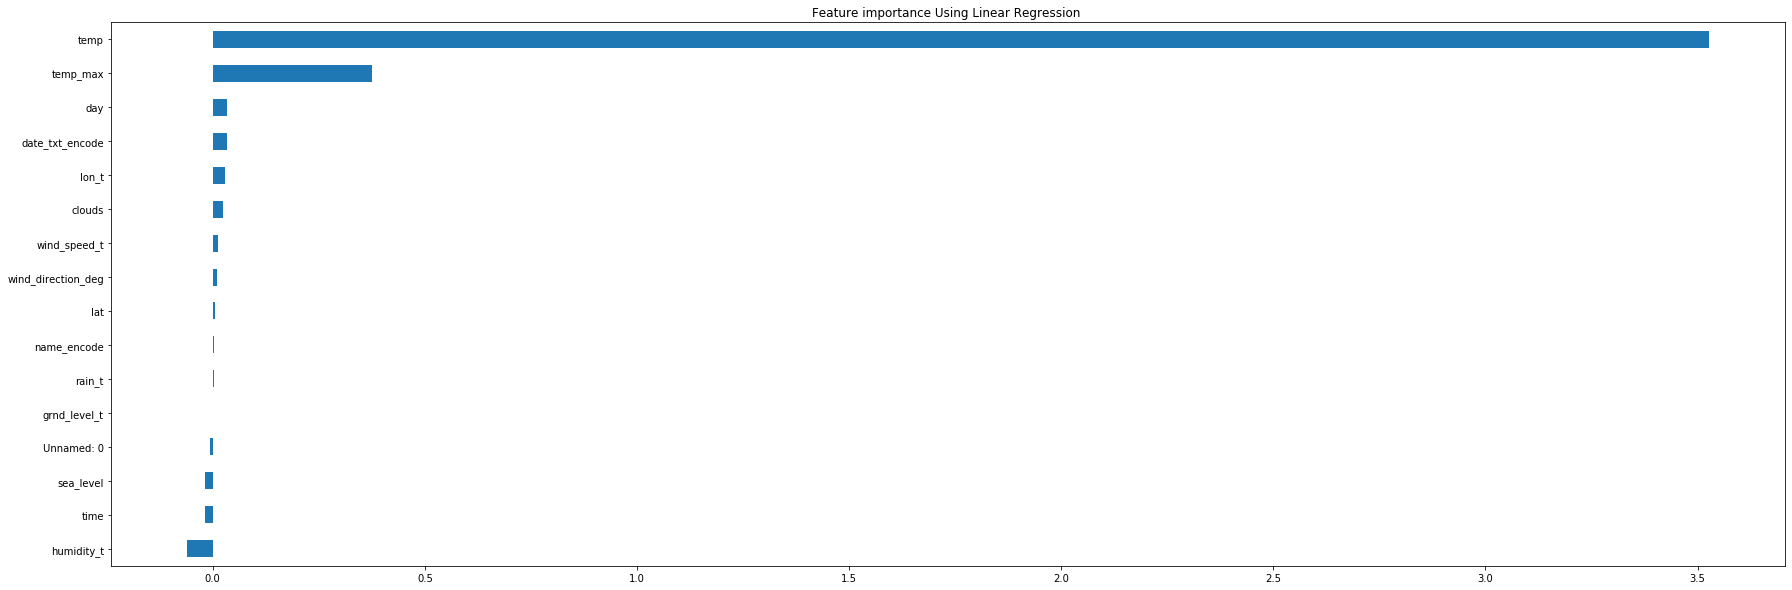

In [42]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (30, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance Using Linear Regression ")

In [ ]:
# Sequence of Imp variables
# + corr: temp > temp_max > date_txt> lon>clouds> wind_speed>wind_direction_deg> 
# - corr: humidity > time > sealevel

In [43]:

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()


rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)
ERROR_random_forest =mean_squared_error(y_test, y_pred)
ERROR_random_forest

E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.06410896626000082

In [44]:
coef = pd.Series(rfr.feature_importances_, index = X.columns)
coef.sort_values(ascending=False)

temp                  0.855536
temp_max              0.122816
sea_level             0.016586
humidity_t            0.002649
date_txt_encode       0.000735
day                   0.000558
wind_direction_deg    0.000225
grnd_level_t          0.000221
wind_speed_t          0.000145
lat                   0.000118
time                  0.000111
Unnamed: 0            0.000076
name_encode           0.000070
lon_t                 0.000064
rain_t                0.000052
clouds                0.000037
dtype: float64

Text(0.5, 1.0, 'Feature importance using RF ')

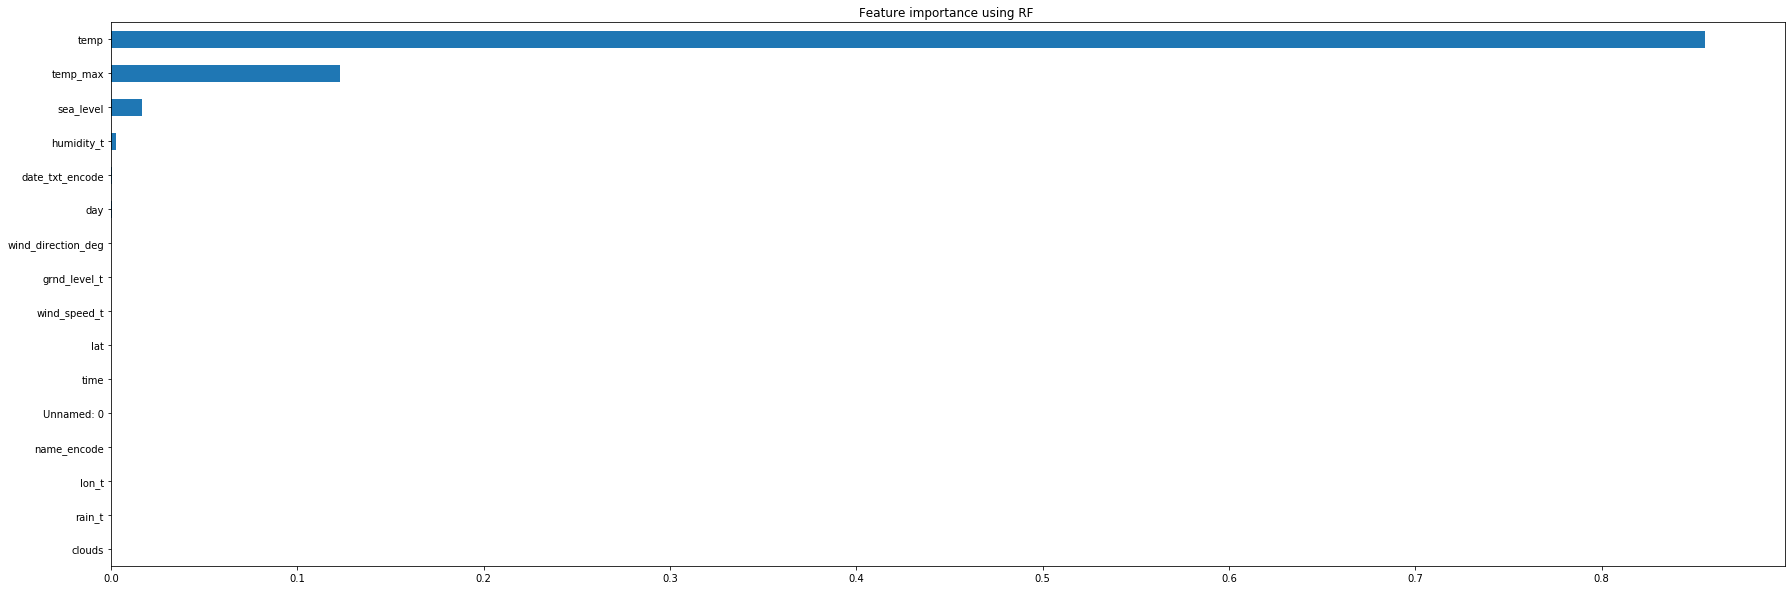

In [45]:
imp_coef1 = coef.sort_values()
plt.rcParams['figure.figsize'] = (30, 10.0)
imp_coef1.plot(kind = "barh")
plt.title("Feature importance using RF ")

In [ ]:
# Sequence of Imp variables
# temp > temp_max >sea_level> humidity>day > wind_directon> humidity > grnd_level>  wind_speed>